In [1]:
import pandas as pd
import csv
import os
import time
from collections import defaultdict
import numpy as np
import itertools
import db_structure
import networkx as nx
from imp import reload
import matplotlib.pyplot as plt
import utilities as u
from flask import jsonify
import logging
logging.basicConfig(format=' %(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
%load_ext autoreload
%aimport -web
%autoreload 2

In [60]:
db = db_structure.DB(os.path.join('datasets', 'sample1'))
db.add_global_fks(["customerNumber","officeCode","productCode","orderNumber"])
db.add_custom_fk('employees', 'customers', 'employeeNumber', 'salesRepEmployeeNum')
db.add_custom_fk('orders', 'customers', 'customerNum', 'customerNumber')
db.add_custom_fk('products', 'productlines', 'productLine', 'ProductLine')
db.add_custom_column_name('customers', 'customerNumber', 'Customer Number')
db.add_custom_column_name('customers', 'LastName', 'Last Name')
db.add_custom_column_name('orders', 'customerNum', 'Customer Num')
#db.unfinalize()
#db.add_custom_column_name('offices', 'State', 'state')
db.finalize()

 2019-08-10 22:33:59,084 - INFO - Loading arch file: datasets/sample1/sample1.arch
 2019-08-10 22:33:59,109 - ERROR - Cannot make configuration changes because it has been finalized either by being loaded from a .arch file or from the finalize() fxn being run. Please run unfinalize(), make your configuration changes, and then run finalize() when you are finished in order to generate a new .arch file
 2019-08-10 22:33:59,110 - ERROR - Cannot make configuration changes because it has been finalized either by being loaded from a .arch file or from the finalize() fxn being run. Please run unfinalize(), make your configuration changes, and then run finalize() when you are finished in order to generate a new .arch file
 2019-08-10 22:33:59,111 - ERROR - Cannot make configuration changes because it has been finalized either by being loaded from a .arch file or from the finalize() fxn being run. Please run unfinalize(), make your configuration changes, and then run finalize() when you are fini

In [77]:
start = time.time()
db3 = db_structure.DB(os.path.join('datasets', 'TOPICC'))
dm = db_structure.DataManager(db3, load_all_data=True)
end = time.time()
print(end-start)

 2019-08-11 10:47:18,529 - INFO - Loading datasets/TOPICC
 2019-08-11 10:47:18,534 - INFO - Loading arch file: datasets/TOPICC/TOPICC.arch
 2019-08-11 10:47:18,540 - DEBUG - Loading file datasets/TOPICC/PHYSIOSTATUS.csv
 2019-08-11 10:47:18,650 - DEBUG - Loading file datasets/TOPICC/PICUDISCHARGE_DISSECONDDX.csv
 2019-08-11 10:47:18,662 - DEBUG - Loading file datasets/TOPICC/PICUADMIT_CHRONICDX.csv
 2019-08-11 10:47:18,691 - DEBUG - Loading file datasets/TOPICC/SURGERY.csv
 2019-08-11 10:47:18,718 - DEBUG - Loading file datasets/TOPICC/PICUDISCHARGE_DISCHRONICDX.csv
 2019-08-11 10:47:18,724 - DEBUG - Loading file datasets/TOPICC/PICUADMIT_AHD.csv
 2019-08-11 10:47:18,730 - DEBUG - Loading file datasets/TOPICC/LIMITOFCARE.csv
 2019-08-11 10:47:18,737 - DEBUG - Loading file datasets/TOPICC/HOSPITALDISCHARGE.csv
 2019-08-11 10:47:18,835 - DEBUG - Loading file datasets/TOPICC/CPR.csv
 2019-08-11 10:47:18,840 - DEBUG - Loading file datasets/TOPICC/CATASTROPHICEVENTS.csv
 2019-08-11 10:47:18

0.7341170310974121


In [63]:
db2 = db_structure.DB(os.path.join('datasets', 'sample2'))
db2.add_global_fks(["col2","col6","col1","col5","col4","col7","col3"])
db2.finalize()

 2019-08-10 22:34:21,619 - INFO - No .arch file found in datasets/sample2
 2019-08-10 22:34:21,619 - INFO - Calculating metadata for files in directory datasets/sample2
 2019-08-10 22:34:21,649 - DEBUG - Linking ['col2', 'col6', 'col1', 'col5', 'col4', 'col7', 'col3'] global_fks
 2019-08-10 22:34:21,650 - INFO - Dumping arch file to: datasets/sample2/sample2.arch


In [66]:
db3 = db_structure.DB(os.path.join('datasets', 'TOPICC'))
db3.add_global_fks(['PudID'])
db3.finalize()

 2019-08-10 23:12:47,711 - INFO - No .arch file found in datasets/TOPICC
 2019-08-10 23:12:47,713 - INFO - Calculating metadata for files in directory datasets/TOPICC
 2019-08-10 23:12:48,723 - DEBUG - Linking ['PudID'] global_fks
 2019-08-10 23:12:48,765 - DEBUG - Cannot make relationship between PICUDISCHARGE_DISSECONDDX->PudID and PICUADMIT_CHRONICDX->PudID because they have a many-to-many relationship
 2019-08-10 23:12:48,766 - DEBUG - Cannot make relationship between PICUDISCHARGE_DISSECONDDX->PudID and SURGERY->PudID because they have a many-to-many relationship
 2019-08-10 23:12:48,768 - DEBUG - Cannot make relationship between PICUDISCHARGE_DISSECONDDX->PudID and PICUDISCHARGE_DISCHRONICDX->PudID because they have a many-to-many relationship
 2019-08-10 23:12:48,769 - DEBUG - Cannot make relationship between PICUDISCHARGE_DISSECONDDX->PudID and PICUADMIT_AHD->PudID because they have a many-to-many relationship
 2019-08-10 23:12:48,770 - DEBUG - Cannot make relationship between 

 2019-08-10 23:12:48,866 - DEBUG - Cannot make relationship between CPR->PudID and PICUADMIT_CHD->PudID because they have a many-to-many relationship
 2019-08-10 23:12:48,868 - DEBUG - Cannot make relationship between CPR->PudID and HOSPITALADMIT_CE->PudID because they have a many-to-many relationship
 2019-08-10 23:12:48,871 - DEBUG - Cannot make relationship between CPR->PudID and PICUADMIT_ADMITSECONDDX->PudID because they have a many-to-many relationship
 2019-08-10 23:12:48,872 - DEBUG - Cannot make relationship between CATASTROPHICEVENTS->PudID and CARDIACPROCEDURES->PudID because they have a many-to-many relationship
 2019-08-10 23:12:48,873 - DEBUG - Cannot make relationship between CATASTROPHICEVENTS->PudID and CARDIACSURGERY->PudID because they have a many-to-many relationship
 2019-08-10 23:12:48,874 - DEBUG - Cannot make relationship between CATASTROPHICEVENTS->PudID and PICUADMIT_CHD->PudID because they have a many-to-many relationship
 2019-08-10 23:12:48,875 - DEBUG - Ca

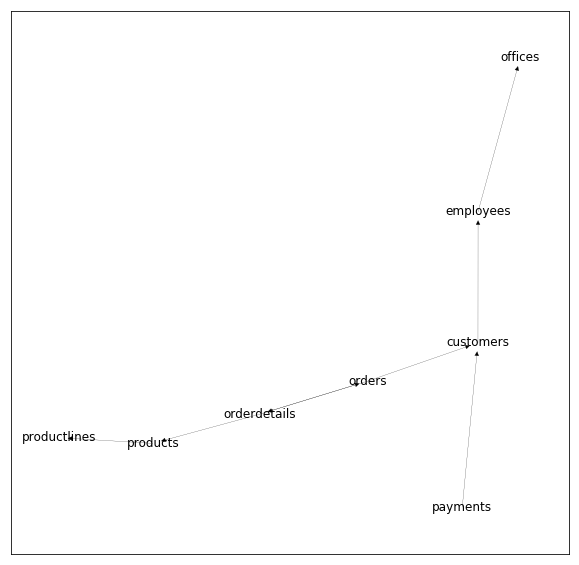

In [72]:
draw_db = db

G = nx.DiGraph()
G.add_nodes_from(draw_db.table_names)
for table_name in draw_db.table_names:
    for sibling in draw_db.find_table_siblings(table_name):
        G.add_edge(table_name, sibling)
        G.add_edge(sibling, table_name)
    for child in draw_db.find_table_children(table_name):
        G.add_edge(table_name, child)
plt.figure(figsize=(10,10))

#draw with networkx built-ins
nx.draw_networkx(G, node_shape="None", width=0.2)

#OR

#draw using pygraphviz
#A = nx.nx_agraph.to_agraph(G)
#H = nx.nx_agraph.from_agraph(A)
#nx.draw_spring(H, node_shape="None", with_labels=True, width=0.2)